In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 실습 1

In [87]:
mu=175
sd= 5
X=180
prob=stats.norm.cdf(X,mu,sd)
print("나의 키의 범위는 : {1:1f}%".format(x,(1-prob)*100))

나의 키의 범위는 : 15.865525%


#### 정규분포를 따르는 키 180cm이상의 경우는 상위 15.865525%로 볼 수 있다. 정규분포에서 P(z>=1)= 1- P(Z<1) 로 구할 수 있다.

# 실습 2

In [29]:
# 실습 2-1 p.234
mu=12
sigma=3
x1=9
x2=15
prob1=stats.norm.cdf(x1,mu,sigma)
prob2=stats.norm.cdf(x2,mu,sigma)

print("{0}km 이상 {1}km 이하를 달릴 확률은 : {2:.3f}%에 해당함".format(x1,x2,prob2-prob1))

9km 이상 15km 이하를 달릴 확률은 : 0.683%에 해당함


#### 9km 이상 15km이하를 달릴 확률을 보면 P(9<=x<=15) = P(-1<=z<=1) = P(z<=1)-P(z<-1)로 값을 구할 수 있다. 결론적으로 9km 이상 15km 이하를 달릴 확률은 68.3%에 해당한다. 

In [167]:
# 실습 2-2 
mu=25.45
sigma=4.82
x1=35
prob=stats.norm.cdf(x1,mu,sigma)

print("{0}km 이상를 달릴 확률은 : {1:.3f}%에 해당함".format(x1,1-prob))

35km 이상를 달릴 확률은 : 0.024%에 해당함


#### 15km 이상를 달릴 확률은 표준정규화를 통해 구할 수 있다. P(X>=15) = P(Z>=1) = 1-P(Z<=1) 로 구할 수 있다. 결론적으로 15km 이상를 달릴 확률은 : 15.9%에 해당된다.

# 실습 3

In [31]:
# 실습 3 
t=2
df=100
prob=stats.t.cdf(t,df)
print("P(T<=t):{:.3f}".format(prob))

P(T<=t):0.976


#### 자유도가 100이고 t 값이 2 인 t분포를 봤을 때, 확률분포를 보면 0.976이다.

# 실습 4

In [32]:
# 실습 4
chisq=3
df=8
prob=stats.chi2.cdf(chisq,df)

print("P(X<{0}):{1:.4f}".format(chisq,prob))

P(X<3):0.0656


#### 자유도가 8이고 카이제곱값이 3 일때 카이제곱은 P(X<3)는 0.0656 이다. 

# 실습 5

In [33]:
# 실습 5 
f=1.5
dfnum=10
dfden=100
prob=stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.850


####  자유도가 10, 자유도가 100인 F분포를 따르는 F값이 1.5일 때의 확률분포는 0.85이다.

# 실습 6

In [104]:
# 실습 6
n=5
for i in range(n+1):
    prob=stats.binom.pmf(k=i,n=n, p=0.05)
    print("P=(X={0})={1:.3f}".format(i,prob))

P=(X=0)=0.774
P=(X=1)=0.204
P=(X=2)=0.021
P=(X=3)=0.001
P=(X=4)=0.000
P=(X=5)=0.000


####  도장공정에서 광택도 불량이 30% 일 때 5대를 임의로 선택했을 때 불량대수가 0,1,2,3,4,5대가 나올 확률은 각각 0.168, 0.360,0.309,0.132,0.028,0.002이다.

# 실습 7

In [35]:
# 실습 7

df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/2sample_t_test.csv", encoding='euc-kr')
df.head()
df=df.dropna()

statistic1,p1= stats.shapiro(df['Mat_A'])
statistic1,p1
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic1,p1))

statistic2,p2= stats.shapiro(df['Mat_B'])
statistic2,p2
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic2,p2))

Shapiro-Wilk Test : statistic=0.906264066696167, p-value=0.2563020884990692
Shapiro-Wilk Test : statistic=0.9729753732681274, p-value=0.9169775247573853


#### 2 sample - t test를 통해 정규성을 따른다를 귀무가설로 정규성을 따르지 않는다는 것을 대립가설로 두었습니다. Mat_A와 Mat_B  둘다 p-value가 0.05를 넘기 때문에 둘다 정규성을 따른다고 판단할 수 있습니다.

# 실습 8

In [36]:
# 실습 8
df=pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
lower,upper =stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
print("신뢰구간:({0}{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([17.83][21.17])


#### 데이터 샘플들에 대해 신뢰구간 95%를 구해주었습니다. df의 값들이 17.83과 21.17 사이에 있을 확률이 95% 입니다.

# 실습 9

In [37]:
# 실습 9 
df=pd.DataFrame({"sample":[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
lower,upper = stats.t.interval(0.95,len(df)-1, loc=np.mean(df),scale=stats.sem(df))
print("신뢰구간:({0}{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([70.6][72.4])


#### 데이터 샘플들에 대해 신뢰구간 95%를 구해주었습니다. df의 값들이 70.6과 72.4 사이에 있을 확률이 95% 입니다.

# 실습 10

<Axes: >

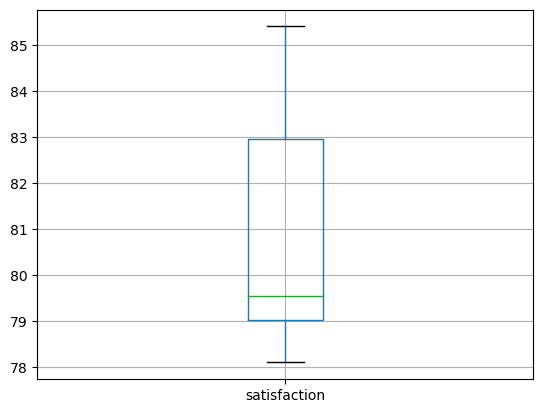

In [38]:
# 실습 10
df = pd.DataFrame({'satisfaction':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
df.boxplot()

In [39]:
t_result=stats.ttest_1samp(df,78.0)
t,p= t_result.statistic.round(3),t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계량 :{}".format(t))
print("pvalue:{}".format(p))

1-Sample t-test
t 통계량 :[3.379]
pvalue:[0.008]


#### 1-sample t-test 로 고객만족도 평균 78.0입니다 로 귀무가설을 , 고객만족도가 평균 78이 아니다를 대립가설로 설정하고 t -test를 진행하였습니다.  검정 통계량 t 의 값은 3.379이고 P-value 값은 0.008입니다. 결론적으로 P-value가 0.05보다 작기 때문에 고객만족도는 평균 78점이 아니며, 검정 통계량을 통해 고객만족도는 개선활동 후 상승하였다고 판단할 수 있습니다.

# 실습 11

In [40]:
# 실습 11 
df = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                   'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.800]})
t_result= stats.ttest_ind(df['A'], df['B'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t 통계량 :{}".format(t))
print("pvalue:{}".format(p))

2-Sample t-test
t 통계량 :1.94
pvalue:0.073


#### 2-sample t-test로 제품 A와 제품 B의  t 통계량과 pvalue를 확인해보았습니다.  P-vaule가 0.073 이므로 제품 A 와 제품 B는 차이가 없다고 판단할 수 있다. 

# 실습 12

In [41]:
# 실습 12
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2= pd.DataFrame({"after":[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result= stats.ttest_rel(df1,df2)
t,p= t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


#### Paired t-test를 진행해주었습니다. 회사원 10명에 대해 영어점수가 학원 가기 전과 후가 같다고 귀무가설을 두고, 영어점수가 학원 가기 전과 후가 다르다고 대립가설을 두었습니다. p-value를 보았을 때 0.05로 입증하고자하는 가설에 힘을 실어 학원가기전과 후의 영어점수가 다르다고 결론 내렸습니다. 그리고 t 통계량을 통해 전보다 후에 성적이 조금 오른 것을 확인하였습니다.

# 실습 13

In [42]:
# 실습 12
count=40
n_obs=100
value=0.5

z,p=proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

1 Proportion test
z:-2.041
p:0.041


#### 100번을 시행하였을 때 앞면이 40번이 발생하였습니다. 귀무가설은 p=0.5 대립가설은 p은 0.5가 아니다 이다. p-value는 0.041로 이 동전의 확률p는 0.5가 아니므로 이 동전은 정상적이지 않다고 판단할 수 있습니다.

# 실습 14

In [43]:
# 실습 14
count=np.array([14,5])
nobs=np.array([1200,1200])
z,p= proportions_ztest(count,nobs)

print("2 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

2 Proportion test
z:2.073
p:0.038


#### 공장 A와 공장 B의 공정의 불량률은 같다를 귀무가설로, 공장 A와 공장 B의 공정 불량률은 다르다를 대립가설로 두었습니다. p-value는 0.038로 공장 A와 공장 B의 공정 불량률은 다르다는 결론을 내렸습니다.

# 실습 15

In [86]:
# 실습 15
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],
                   'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
chi, pval, dof, expected = stats.chi2_contingency(df)
print('chi-square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq:98.274
p:0.000
degree pf freedom:30
expected value:
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


#### A,B,C,D,E,F 6가지 제품에 대해서 각 이미지에 대해 차이가 없다는 귀무가설, 6가지 제품에 대해 차이가 있다는 대립가설을 두었습니다. P-value는 0으로 6가지 제품은 확실하게 차이가 있다는 판단을 내렸습니다. 어떤 제품이 다른지에 대해서는 실제값과 기대값을 통해 차이가 큰 제품이 차이가 있다고 판단할 수 있습니다.

# 실습 16

In [55]:
# 실습 16-1 : 강종별로 2차 정렬시간의 차이가 있는가 검정
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/ANOVA.csv", encoding='euc-kr')
df[["time","gangjong"]]

df= pd.DataFrame({'a':[32.2,30.4,33.6,36.4,33.9,34.9],
                   'b':[33.1,29.9,31.7,27.5,34.0,30.7],
                   'c':[32.6,32.7,29.3,25.9,31.1,23.8],
                   'd':[26.7,28.5,30.9,26.2,32.3,23.7]})

<Axes: >

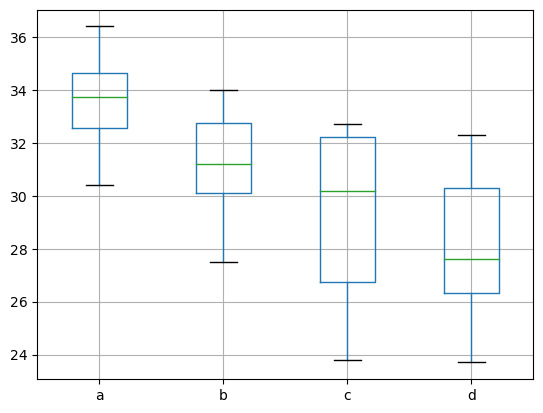

In [56]:
df.boxplot()

In [57]:
statistic,p= stats.shapiro(df['a'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9879403114318848, p-value=0.983557939529419


In [58]:
statistic,p= stats.shapiro(df['b'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9769707918167114, p-value=0.9355478286743164


In [59]:
statistic,p= stats.shapiro(df['c'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8929420113563538, p-value=0.3338908553123474


In [60]:
statistic,p= stats.shapiro(df['d'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9713904857635498, p-value=0.901641845703125


In [61]:
stats.bartlett(df['a'],df['b'],df['c'],df['d'])

BartlettResult(statistic=1.8729084232387967, pvalue=0.5991991808067023)

In [62]:
f_result=stats.f_oneway(df['a'],df['b'],df['c'],df['d'])
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F 통계량:4.172
p-value:0.019


#### ANOVA를 통해 철강의 강종별로 정렬시간의 차이가 있는지 분석하였습니다. 귀무가설로 철강의 강종별로 정렬시간이 모두 같습니다. 대립가설로 적어도 하나의 강종이라도 다른 것이 존재한다고 두었습니다.  p-value가 0.019로 적어도 하나의 강종은 다른 것으로  판단할 수 있습니다.

In [70]:
# 실습 16-1 : 강종별로 2차 정렬시간의 차이가 있는가 검정
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/ANOVA.csv", encoding='euc-kr')
df[["time","type"]]

dfa=df[df['type']=='a']
dfb=df[df['type']=='b']

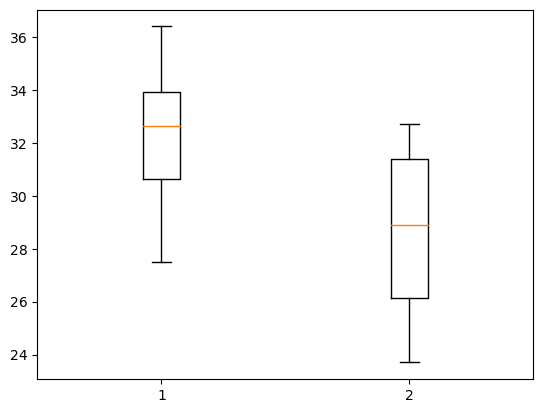

In [85]:
plt.boxplot([dfa['time'], dfb['time']])
plt.show()

In [76]:
statistic,p= stats.shapiro(dfa['time'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.982139527797699, p-value=0.9907686114311218


In [77]:
statistic,p= stats.shapiro(dfb['time'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9098271131515503, p-value=0.2122616022825241


In [78]:
stats.bartlett(dfa['time'],dfb["time"])

BartlettResult(statistic=0.9529700642151171, pvalue=0.3289644435379069)

In [79]:
f_result=stats.f_oneway(dfa['time'],dfb['time'])
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F 통계량:9.654
p-value:0.005


#### ANOVA를 통해 type별로 정렬시간의 차이가 있는지 분석하였습니다. 귀무가설로 철강의 type별로 정렬시간이 모두 같습니다. 대립가설로 적어도 하나의 강종이라도 다른 것이 존재한다고 두었습니다.  p-value가 0.005로 적어도 하나의 강종은 다른 것으로  판단할 수 있습니다.

# 실습 17

In [138]:
# 실습 17
df1= [37.6,38.6,37.2,36.4,38.6,39.0,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39.0,36.9,36.8,37.6,33.0,33.5]
df2= [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]
corr,pval=stats.pearsonr(df1,df2)

print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000


In [123]:
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초111/pulse.csv")
df

,Pulse,Smokes,Sex,Height,Weight
0,64,2,1,165.0,63.0
1,58,2,1,180.0,65.3
2,62,1,1,183.8,72.0
3,66,1,1,182.5,85.5
4,64,2,1,172.5,69.8
...,...,...,...,...,...
87,90,1,2,160.0,56.3
88,78,2,2,170.0,59.9
89,68,2,2,155.0,49.5
90,86,2,2,167.5,67.5


#### 초코칩의 강도와 재료반죽 온도간에 상관관계를 분석하였을 때 p-value가 0이고 corr이 -0.723이 나왔습니다. 결론적으로 초코칩의 강도와 재료반죽 온도간에 매우 강한 음의 상관관계가 있다고 판단하였습니다.

In [176]:
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초111/pulse.csv")
df1=df[["Pulse"]]
df2=df[["Height"]]

corr,pval=stats.pearsonr(df1["Pulse"],df["Height"])
print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.212
p-value:0.043


In [140]:
df[1:1]

,Pulse,Smokes,Sex,Height,Weight


In [171]:
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초111/강판강도.csv",encoding='euc-kr')
df

,개선전,개선후
0,68.7,73.4
1,71.4,77.0
2,69.8,73.7
3,75.3,73.3
4,71.3,73.1
5,72.7,74.5
6,66.9,77.5
7,70.2,76.4
8,74.4,75.7
9,70.1,NaN


In [170]:
# 실습 12
df1 = pd.DataFrame({'before':[68.7,71.4,69.8,75.3,71.3,72.7,66.9,70.2,74.4]})
df2= pd.DataFrame({"after":[73.4,77.0,73.7,73.3,73.1,74.5,77.5,76.4,75.7]})

t_result= stats.ttest_rel(df1,df2)
t,p= t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-3.135]
p:[0.014]


In [ ]:
# 실습 7

df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/2sample_t_test.csv", encoding='euc-kr')
df.head()
df=df.dropna()

statistic1,p1= stats.shapiro(df['Mat_A'])
statistic1,p1
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic1,p1))

statistic2,p2= stats.shapiro(df['Mat_B'])
statistic2,p2
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic2,p2))

In [102]:
# 연습 15
df = pd.DataFrame({'Work_저':[182,154],'Work_중':[213,138],'Work_고':[203,110]})
chi, pval, dof, expected = stats.chi2_contingency(df)
print('chi-square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq:7.878
p:0.019
degree pf freedom:2
expected value:
[[200.928 209.898 187.174]
 [135.072 141.102 125.826]]


In [ ]:
df = pd.DataFrame({'Work_저':[182,154],'Work_중':[213,138],'Work_고':[203,110]})

In [165]:
df1= pd.DataFrame({"A":[25,30,20,23,27,33,23,20,25,24,31,30,34,30,28,31,30,31,32,30,19,21,27,25,25,30,26,29,30,24,18,25,16,19,20,20,25,22,23,17]})
df1.describe()


,A
count,40.000000
mean,25.450000
std,4.824882
min,16.000000
25%,21.750000
50%,25.000000
75%,30.000000
max,34.000000


In [166]:
(35-25.45)/4.82

1.9813278008298756